In [13]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv('/content/sample_data/electric_vehicles_spec_2025.csv.csv')

In [15]:
df

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [17]:
# remove null values
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 0 to 470
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      264 non-null    object 
 1   model                      264 non-null    object 
 2   top_speed_kmh              264 non-null    int64  
 3   battery_capacity_kWh       264 non-null    float64
 4   battery_type               264 non-null    object 
 5   number_of_cells            264 non-null    float64
 6   torque_nm                  264 non-null    float64
 7   efficiency_wh_per_km       264 non-null    int64  
 8   range_km                   264 non-null    int64  
 9   acceleration_0_100_s       264 non-null    float64
 10  fast_charging_power_kw_dc  264 non-null    float64
 11  fast_charge_port           264 non-null    object 
 12  towing_capacity_kg         264 non-null    float64
 13  cargo_volume_l             264 non-null    object 
 14 

In [19]:
X=df.drop('range_km',axis=1)
y=df['range_km']

In [20]:
print(X.shape)
print(y.shape)


(264, 21)
(264,)


In [21]:
#heatmap to find corelation
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

In [27]:
data=df[['top_speed_kmh' ,'battery_capacity_kWh' ,'number_of_cells','torque_nm','range_km']]


<Axes: >

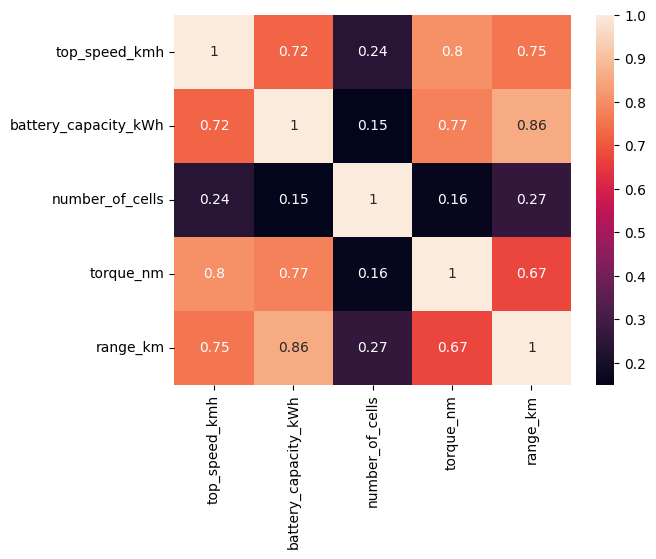

In [28]:
sns.heatmap(data.corr(),annot=True)

In [32]:
X=df[['top_speed_kmh' ,'battery_capacity_kWh','torque_nm']]   #independent variables
y=df['range_km']     # dependent variable

In [31]:
# split dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.2 ,random_state=42)

In [33]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [34]:
import os

# Path to the new folder
folder_path = '/content/drive/MyDrive/my_dataset_folder'

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)
print("Folder created at:", folder_path)


Folder created at: /content/drive/MyDrive/my_dataset_folder


In [37]:
!cp /content/sample_data/electric_vehicles_spec_2025.csv.csv /content/drive/MyDrive/my_dataset_folder/


In [38]:
!git config --global user.name "mangoapple4269"
!git config --global user.email "mangoapple4269@gmail.com"


In [42]:
# Replace with your actual filenames
!cp /content/Ev.ipynb /content/EV-range-prediction/
!cp /content/sample_data/electric_vehicles_spec_2025.csv.csv /content/EV-range-prediction/


cp: cannot stat '/content/Ev.ipynb': No such file or directory


In [43]:
# Step 4: Save the current notebook to the cloned repo folder
import os
import shutil

repo_path = '/content/EV-range-prediction'
notebook_name = 'main.ipynb'  # change this to what you want it called in GitHub

# Save a copy of the notebook
notebook_path = f"{repo_path}/{notebook_name}"
shutil.copy('/content/drive/MyDrive/Colab Notebooks/Ev.ipynb', notebook_path)


'/content/EV-range-prediction/main.ipynb'

In [45]:
# Step 5: Copy dataset from sample_data (replace with actual filename)
dataset_name = 'ev_battery_charging_data.csv'  # your dataset name
!cp /content/sample_data/ev_battery_charging_data.csv {repo_path}/


cp: cannot stat '/content/sample_data/ev_battery_charging_data.csv': No such file or directory


In [47]:
!cp /content/sample_data/electric_vehicles_spec_2025.csv.csv /content/EV-range-prediction/


In [51]:
# Go into the cloned repo folder
%cd /content/EV-range-prediction


/content/EV-range-prediction


In [52]:
# Stage all changes
!git add .
